In [58]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [59]:
def load_vectors(file_path):
    word_vecs = {}
    with open(file_path) as f:
        for line in f:
            line = line.strip()
            if line and line[0].isalpha():
                word = line.split()[0]
                vector = [float(e) for e in line.split()[1:]]
                word_vecs[word] = np.array(vector)
    return word_vecs

def extract_vectors(word_vecs, words):
    extracted_vecs = []
    for word in words:
        word_vec = word_vecs[word]
        extracted_vecs.append(word_vec)
    return np.array(extracted_vecs)

# Cette fonction permet de trouver mot le plus proche que l'hypothese distributionnelle dans l'espace sémantique
def search_most_similar_word(word1, word2, word3, candidate_words, word_vecs):
    word_vec_pairs = {word: word_vecs[word] for word in candidate_words}
    
    nearest_distance = np.inf
    most_similar_word = None
    
    analogy = word_vec_pairs[word1] - word_vec_pairs[word2] + word_vec_pairs[word3]
    
    for word, vec in word_vec_pairs.items():
        distance = np.linalg.norm(analogy - vec)
        print(f"distance between analogy and word {word} = {distance}")
        if distance < nearest_distance:
            nearest_distance = distance
            most_similar_word = word
    print(f"the most similar word of analogy {word1} - {word2} + {word3} is {most_similar_word}")

71290


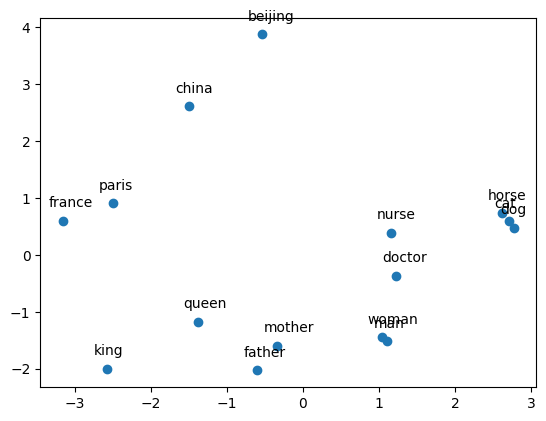

In [68]:
word_vecs = load_vectors("./vectors_text8.txt")
words = ['man', 'woman', 'king', 'queen', 'cat', 'dog', 'mother', 'father', 'doctor', 'nurse', 'horse', 'beijing', 'paris', 'china', 'france']
extracted_vecs = extract_vectors(word_vecs, words)
print(len(word_vecs))
pca = PCA(n_components=2)
vectors_2D = pca.fit_transform(extracted_vecs)

plt.scatter(vectors_2D[:, 0], vectors_2D[:, 1])
for i, word in enumerate(words):
    plt.annotate(
        word,
        xy=(vectors_2D[i, 0], vectors_2D[i, 1]),
        xytext=(-10, 10),
        textcoords='offset points'
    )
    
plt.show()

In [41]:
analogy1 = search_most_similar_word('king', 'man', 'woman', words, word_vecs)

distance between analogy and word man = 5.981596139628285
distance between analogy and word woman = 4.948155939827281
distance between analogy and word king = 2.9407704098868375
distance between analogy and word queen = 3.775225298360748
distance between analogy and word cat = 6.923189160077095
distance between analogy and word dog = 7.260581488060994
distance between analogy and word mother = 4.457772429691874
distance between analogy and word father = 4.678484123139994
distance between analogy and word doctor = 6.67747425165676
distance between analogy and word nurse = 6.177063128163659
distance between analogy and word horse = 7.113689197440735
distance between analogy and word beijing = 7.069784873090694
distance between analogy and word paris = 5.901526709864322
distance between analogy and word china = 6.127939876716889
distance between analogy and word france = 4.987235089710931
the most similar word of analogy king - man + woman is king


In [42]:
search_most_similar_word('father', 'man', 'woman', words, word_vecs)

distance between analogy and word man = 5.64311157839033
distance between analogy and word woman = 3.7662412867200903
distance between analogy and word king = 5.883705724938409
distance between analogy and word queen = 5.301479574159464
distance between analogy and word cat = 6.161876371759336
distance between analogy and word dog = 6.747441884637392
distance between analogy and word mother = 2.7366022841191224
distance between analogy and word father = 2.9407704098868375
distance between analogy and word doctor = 6.011022850045073
distance between analogy and word nurse = 5.450552921138185
distance between analogy and word horse = 6.701615120040542
distance between analogy and word beijing = 7.059907607911665
distance between analogy and word paris = 6.005267520298242
distance between analogy and word china = 6.418380093466731
distance between analogy and word france = 6.05009185193225
the most similar word of analogy father - man + woman is mother


In [43]:
search_most_similar_word('doctor', 'man', 'woman', words, word_vecs)

distance between analogy and word man = 6.189997983577619
distance between analogy and word woman = 4.965045257241166
distance between analogy and word king = 7.023316402988478
distance between analogy and word queen = 6.333556022396423
distance between analogy and word cat = 5.878266803121307
distance between analogy and word dog = 6.468970799958754
distance between analogy and word mother = 5.091095721249209
distance between analogy and word father = 5.304802282037664
distance between analogy and word doctor = 2.9407704098868375
distance between analogy and word nurse = 3.7225647424570063
distance between analogy and word horse = 6.164867042827282
distance between analogy and word beijing = 6.812231957220114
distance between analogy and word paris = 6.5224684962077815
distance between analogy and word china = 6.612284981359017
distance between analogy and word france = 6.993200986515903
the most similar word of analogy doctor - man + woman is doctor


In [61]:
search_most_similar_word('beijing', 'china', 'france', words, word_vecs)

distance between analogy and word man = 6.307461238431751
distance between analogy and word woman = 6.069454785328332
distance between analogy and word king = 5.909334844341874
distance between analogy and word queen = 4.917493265048362
distance between analogy and word cat = 6.386031167638159
distance between analogy and word dog = 6.472942872054024
distance between analogy and word mother = 5.6435378206084525
distance between analogy and word father = 6.041765270567866
distance between analogy and word doctor = 6.843786202679186
distance between analogy and word nurse = 5.9618404191637
distance between analogy and word horse = 6.471809831908845
distance between analogy and word beijing = 4.34288325922687
distance between analogy and word paris = 3.521656362799897
distance between analogy and word china = 5.829551349608476
distance between analogy and word france = 4.219501369254073
the most similar word of analogy beijing - china + france is paris


In [62]:
def random_delete_word(word_to_delete, origin_file_path, new_file_path):
    with open(origin_file_path, 'r', encoding='utf-8') as f:
        content = f.read().split()
        
    random = np.random.rand()
    for index, word in enumerate(content):
        if word == word_to_delete and random < 0.6:
            del content[index]
    
    content_after_deletion = " ".join(content)
        
    with open(new_file_path, 'w', encoding='utf-8') as f:
        f.write(content_after_deletion)
            
random_delete_word('mother', "./GloVe/text8", './text8_after_deletion_mother.txt')

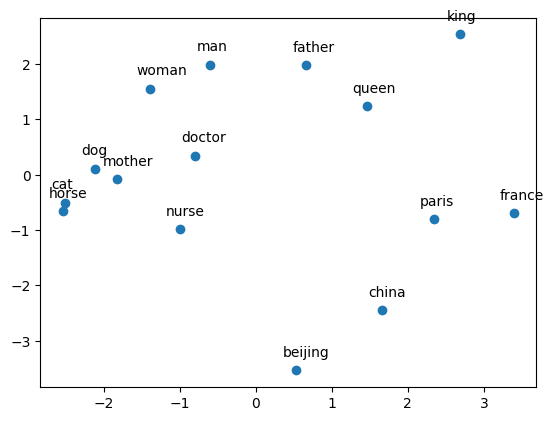

In [69]:
word_vec_del_mother = load_vectors("./vectors_deletion_mother.txt")
words = ['man', 'woman', 'king', 'queen', 'cat', 'dog', 'mother', 'father', 'doctor', 'nurse', 'horse', 'beijing', 'paris', 'china', 'france']
extracted_vecs_del_mother = extract_vectors(word_vec_del_mother, words)
vectors_2D_del_mother = pca.fit_transform(extracted_vecs_del_mother)
plt.scatter(vectors_2D_del_mother[:, 0], vectors_2D_del_mother[:, 1])
for i, word in enumerate(words):
    plt.annotate(
        word,
        xy=(vectors_2D_del_mother[i, 0], vectors_2D_del_mother[i, 1]),
        xytext=(-10, 10),
        textcoords='offset points'
    )

In [70]:
search_most_similar_word('father', 'man', 'woman', words, word_vec_del_mother)

distance between analogy and word man = 4.936887131854849
distance between analogy and word woman = 3.513294477058534
distance between analogy and word king = 5.602832071485812
distance between analogy and word queen = 4.908076300911387
distance between analogy and word cat = 5.532690760192729
distance between analogy and word dog = 6.1088605736926915
distance between analogy and word mother = 4.794052034215002
distance between analogy and word father = 2.6257805382312513
distance between analogy and word doctor = 5.329255556139619
distance between analogy and word nurse = 5.063815268884025
distance between analogy and word horse = 6.417073435084173
distance between analogy and word beijing = 6.488826369324039
distance between analogy and word paris = 5.8196302751104385
distance between analogy and word china = 6.11837511819004
distance between analogy and word france = 6.437786993630963
the most similar word of analogy father - man + woman is father
